In [51]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv('date-hour-soo-dest-2020.csv')
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2020-01-01,0,12TH,16TH,5
1,2020-01-01,0,12TH,24TH,3
2,2020-01-01,0,12TH,ASHB,6
3,2020-01-01,0,12TH,BAYF,1
4,2020-01-01,0,12TH,CIVC,3


In [53]:
df['Date']=pd.to_datetime(df['Date'])

In [54]:
df['day']=df['Date'].dt.dayofweek
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

df['weekday']=df['Date'].dt.day_name()
df['month_name']=df['Date'].dt.month_name()

In [55]:
df=df.drop('Date',axis=1)
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,0,12TH,16TH,5,2,1,2020,Wednesday,January
1,0,12TH,24TH,3,2,1,2020,Wednesday,January
2,0,12TH,ASHB,6,2,1,2020,Wednesday,January
3,0,12TH,BAYF,1,2,1,2020,Wednesday,January
4,0,12TH,CIVC,3,2,1,2020,Wednesday,January


In [56]:
#df['rotation']=df[['Origin Station','Destination Station']].apply(lambda x:'-'.join(x),axis=1)

### EDA

In [57]:
df.sample(10)

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
553876,6,RICH,WOAK,3,3,1,2020,Thursday,January
3488559,7,HAYW,DALY,1,4,7,2020,Friday,July
2637487,7,CAST,EMBR,5,3,5,2020,Thursday,May
1168337,11,BAYF,ASHB,1,4,2,2020,Friday,February
147950,5,WARM,SANL,1,1,1,2020,Tuesday,January
4954240,14,WCRK,CONC,3,6,11,2020,Sunday,November
3928389,13,WDUB,BAYF,3,0,8,2020,Monday,August
1186540,22,FRMT,POWL,1,4,2,2020,Friday,February
2376996,20,PLZA,MONT,1,5,4,2020,Saturday,April
5671435,6,DALY,COLS,1,0,12,2020,Monday,December


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   day                  int64 
 5   month                int64 
 6   year                 int64 
 7   weekday              object
 8   month_name           object
dtypes: int64(5), object(4)
memory usage: 399.1+ MB


In [59]:
df.describe()

,Hour,Trip Count,day,month,year
count,5.811863e+06,5.811863e+06,5.811863e+06,5.811863e+06,5811863.0
mean,1.352784e+01,5.407264e+00,2.777982e+00,5.936740e+00,2020.0
std,4.925962e+00,1.811828e+01,1.891037e+00,3.676376e+00,0.0
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2020.0
25%,9.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2020.0
50%,1.400000e+01,2.000000e+00,3.000000e+00,6.000000e+00,2020.0
75%,1.800000e+01,4.000000e+00,4.000000e+00,9.000000e+00,2020.0
max,2.300000e+01,9.250000e+02,6.000000e+00,1.200000e+01,2020.0


In [60]:
df.corr()

,Hour,Trip Count,day,month,year
Hour,1.000000,-0.017611,0.074817,-0.018326,NaN
Trip Count,-0.017611,1.000000,-0.042222,-0.165873,NaN
day,0.074817,-0.042222,1.000000,-0.046301,NaN
month,-0.018326,-0.165873,-0.046301,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN


In [61]:
df['Trip Count'].value_counts().describe()

count    7.740000e+02
mean     7.508867e+03
std      1.017191e+05
min      1.000000e+00
25%      3.000000e+00
50%      1.700000e+01
75%      1.090000e+02
max      2.500495e+06
Name: Trip Count, dtype: float64

In [62]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
day                    0
month                  0
year                   0
weekday                0
month_name             0
dtype: int64

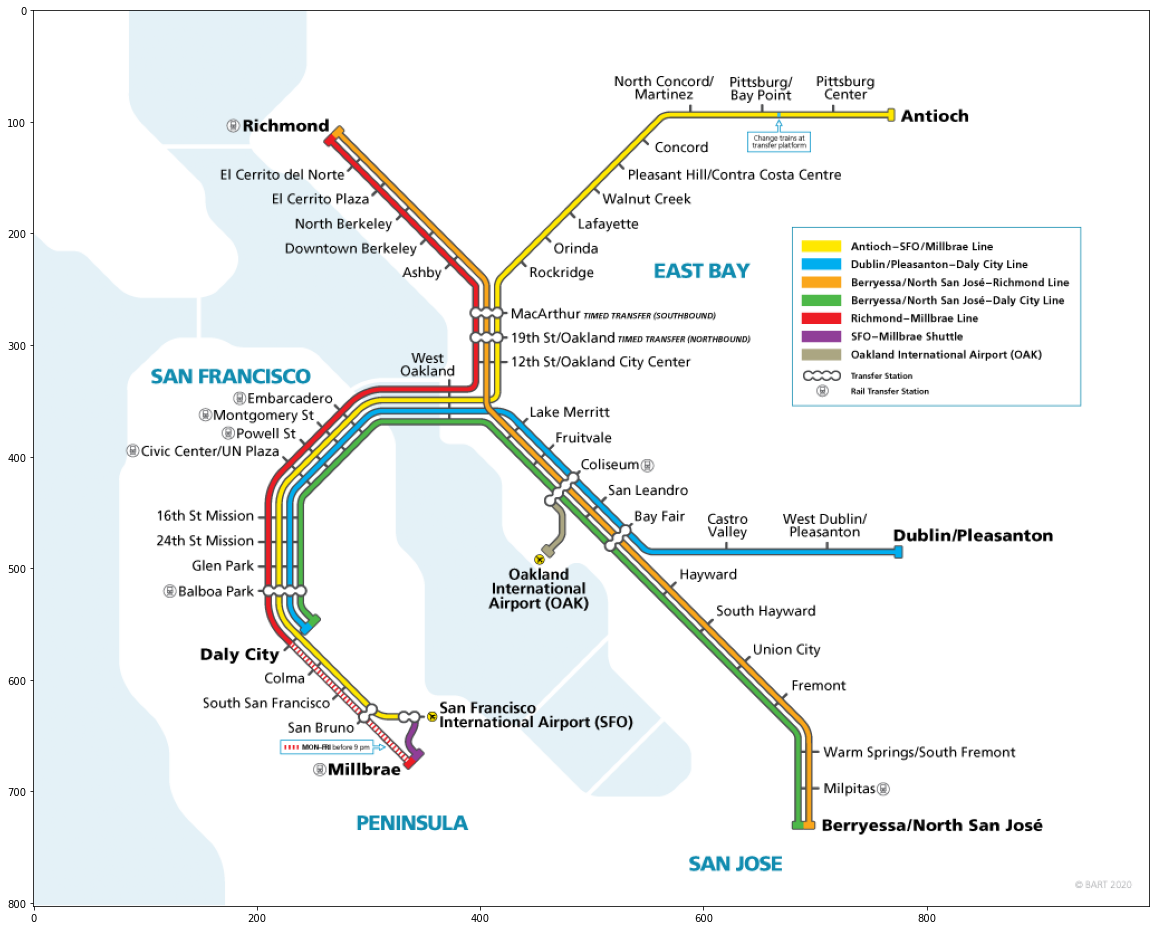

In [13]:
plt.figure(figsize=(20,20))
img=plt.imread('system-map-weekday.png')
plt.imshow(img)
plt.show();

In [14]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF',
       'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN',
       'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
       'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PCTR',
       'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN',
       'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK',
       'BERY', 'MLPT'], dtype=object)

In [15]:
origin_station=pd.read_excel('Station_Names.xls')

In [16]:
origin_station=origin_station.drop('Unnamed: 0',axis=1)
origin_station

,Two-Letter Station Code,Station Name
0,RM,Richmond
1,EN,El Cerrito Del Norte
2,EP,El Cerrito Plaza
3,NB,North Berkeley
4,BK,Berkeley
5,AS,Ashby
6,MA,MacArthur
7,19,19th Street Oakland
8,12,12th Street / Oakland City Center
9,LM,Lake Merritt


### Vizualization

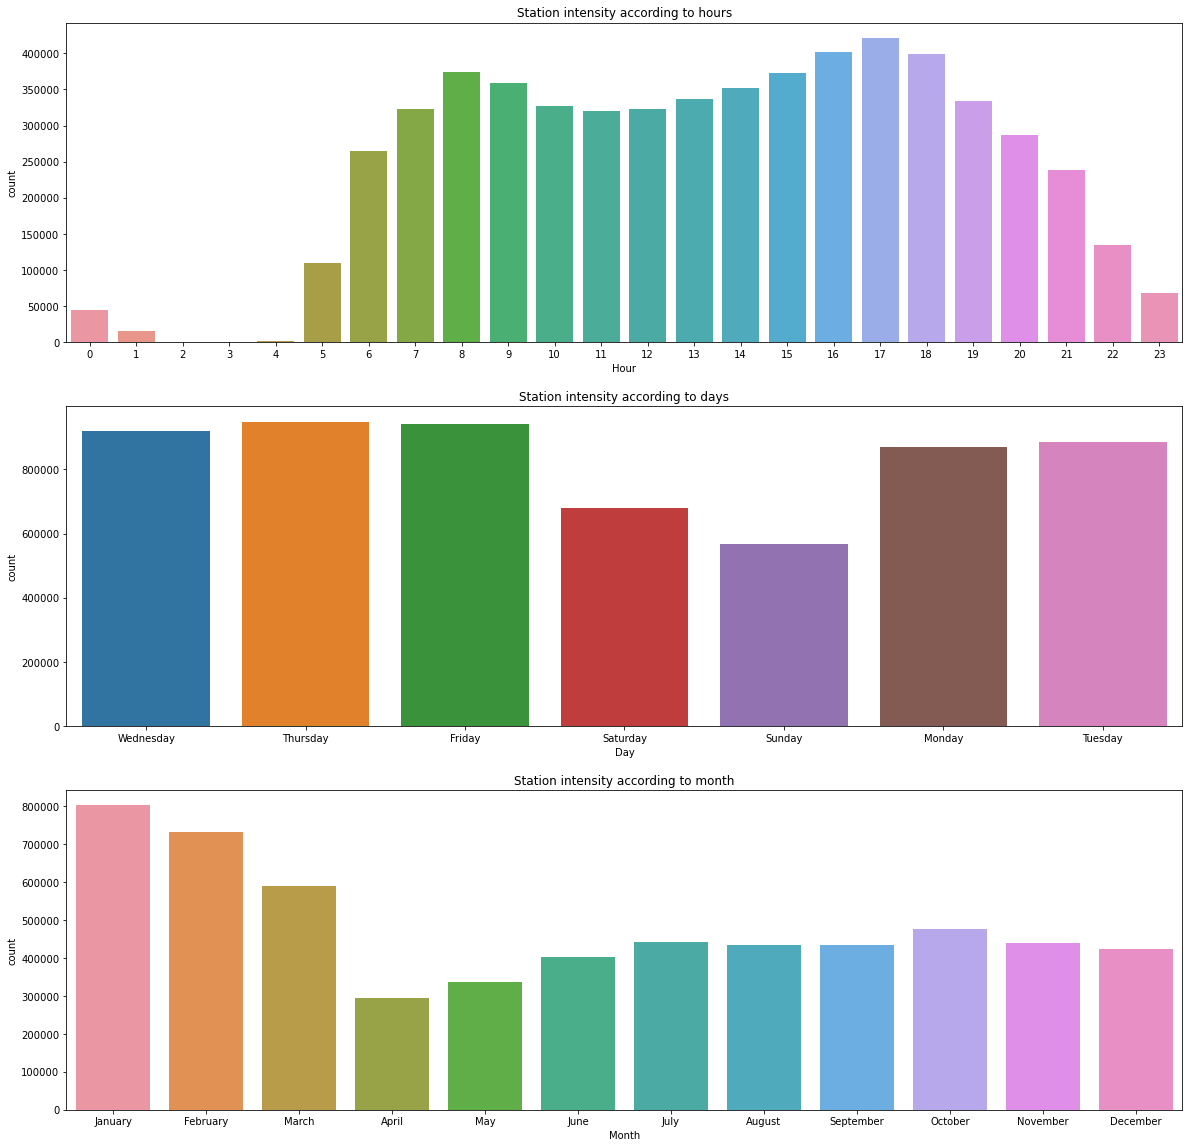

In [17]:
fig=plt.figure(figsize=(20,20))

ax=fig.add_subplot(3,1,1)
ax=sns.countplot(df['Hour'])
ax.set_title('Station intensity according to hours')
ax.set_xlabel('Hour')

bx=fig.add_subplot(3,1,2)
bx=sns.countplot(df['weekday'])
bx.set_title('Station intensity according to days')
bx.set_xlabel('Day')

cx=fig.add_subplot(3,1,3)
cx=sns.countplot(df['month_name'])
cx.set_title('Station intensity according to month')
cx.set_xlabel('Month');


- BART'ın kullanıldığı en yoğun saat 17.00 dır.Büyük ihtimalle iş çıkışı saati olduğu için.En yoğun kullanıldığı günler perşembe ve cuma günleridir.En yoğun kullanıldığı ay Ocak ayıdır.

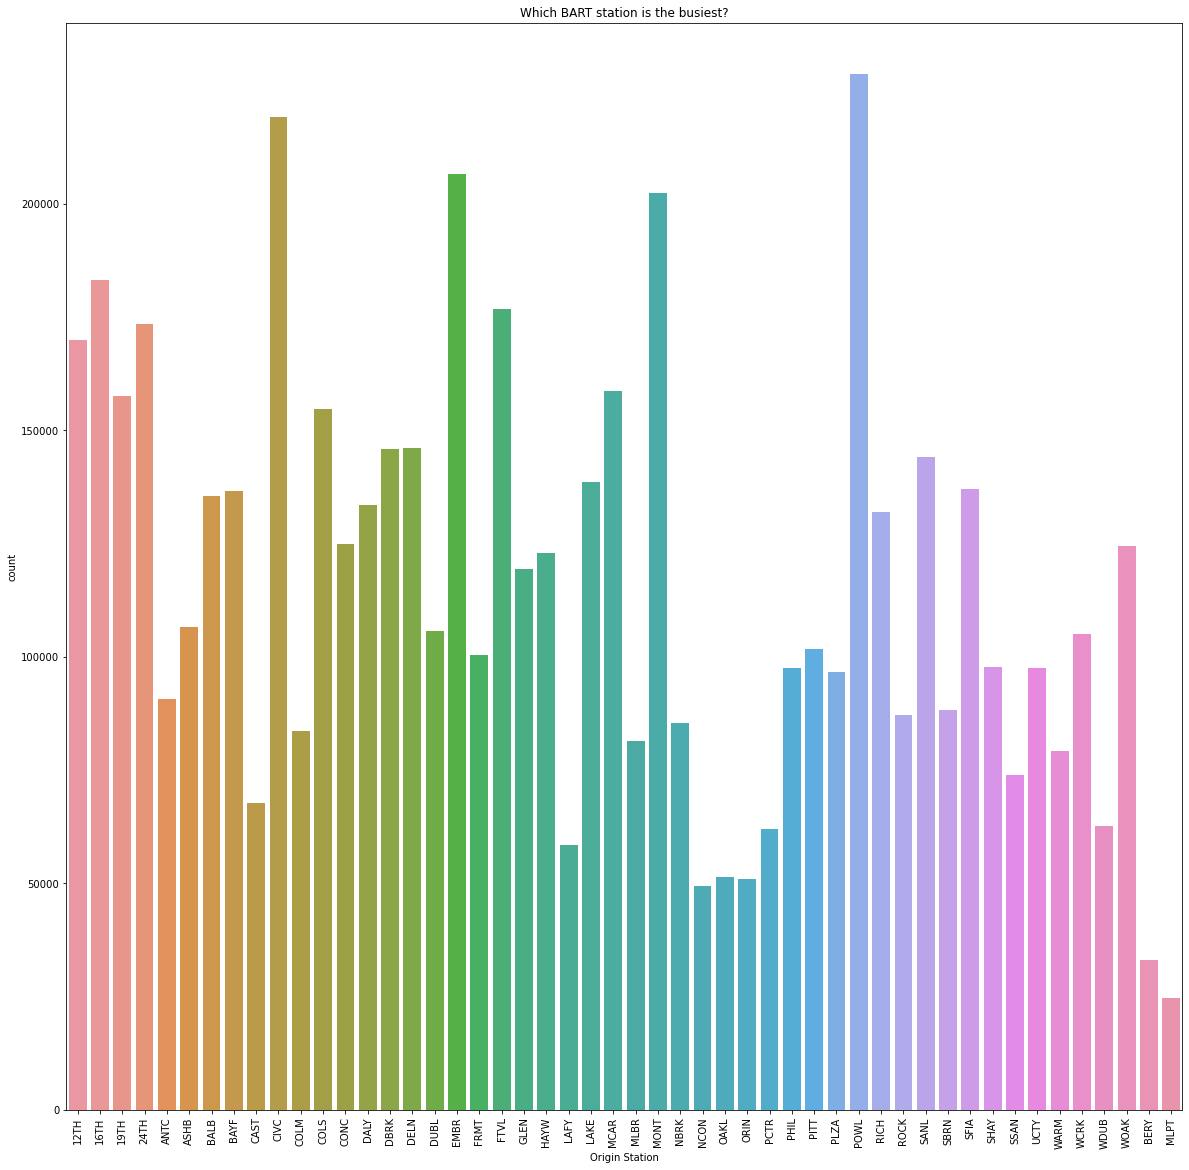

In [18]:
fig=plt.figure(figsize=(20,20))

ax=sns.countplot(df['Origin Station'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);


- En yoğun BART istasyonu POWL istasyonudur.

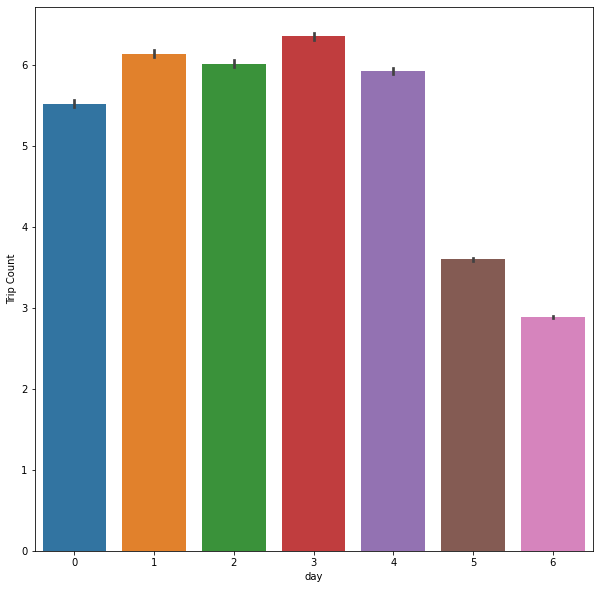

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['day'],y=df['Trip Count']);

- Görünüşe göre en yoğun gün Perşembe dir.

In [74]:
x=df[['day']]
y=df['Trip Count']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [76]:
lr=LinearRegression()
pred=lr.fit(x_train,y_train).predict(x_test)

In [79]:
mean_squared_error(y_test,pred)**.5

18.118717808823153

In [80]:
r2_score(y_test,pred)

0.0017877038055135186

In [ ]:
#from pycaret.regression import *
#exp_name=setup(data=x,target='Trip Count')

In [ ]:
#best_model=compare_models(sort='R2')